# Итоговая кластеризация

Для кластеризации были выбраны финансовые и соц.демограф. показатели пользователя
Кластеризация была реализована на sample (size=100k).

В результате было выделено 10 кластеров.

Код кластеризации был удален, однако если необходимо восстановить, то можно написать tg @zyuzyunda

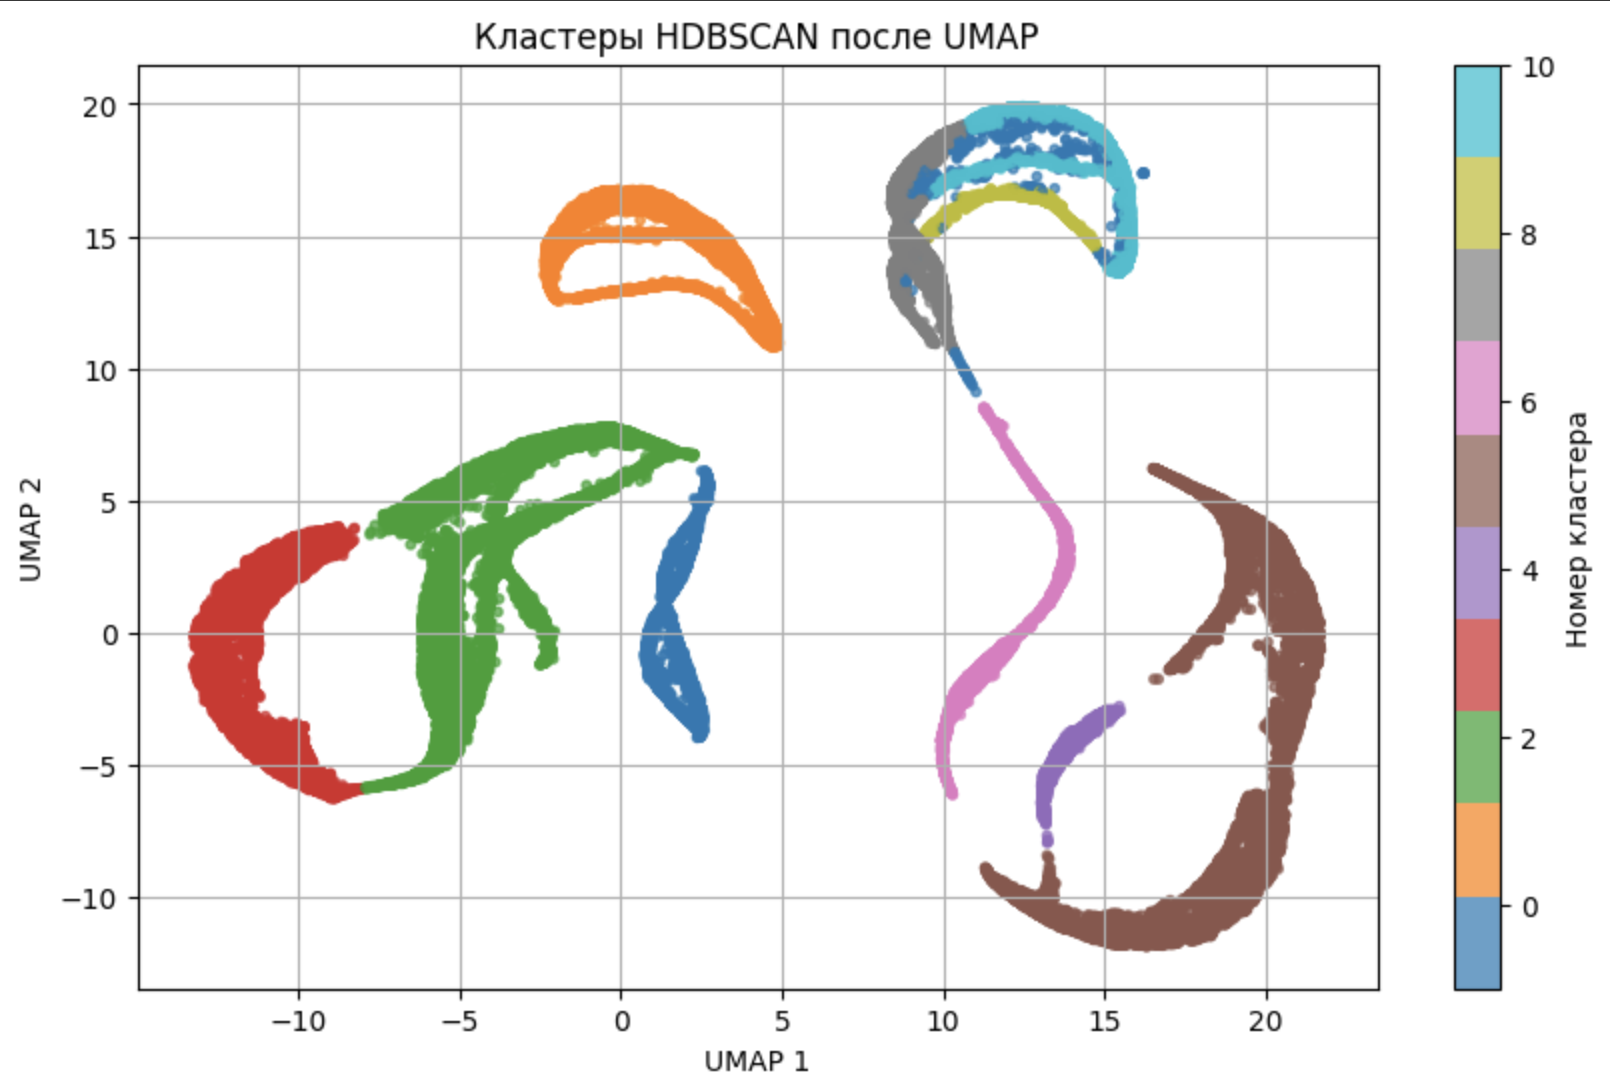

# lib

In [ ]:
pd.set_option('display.max_colwidth', None)

NameError: name 'pd' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import hdbscan
import pandas as pd
import numpy as np

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hdbscan
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import umap.umap_ as umap

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# загрузка датасета

In [ ]:
soc_dem_features = pd.read_csv('/content/drive/MyDrive/parser_data/tbank/df_srednyi_dohod_v2.csv')

In [ ]:
soc_dem_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593433 entries, 0 to 593432
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   key                 593433 non-null  int64  
 1   age                 593432 non-null  float64
 2   longitude           589370 non-null  float64
 3   monthly_income_amt  593433 non-null  object 
 4   gender_cd           592454 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 22.6+ MB


In [ ]:
hlop = pd.read_csv('/content/drive/MyDrive/parser_data/tbank/hlop.csv')

In [ ]:
hlop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593433 entries, 0 to 593432
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Unnamed: 0  593433 non-null  int64
 1   key         593433 non-null  int64
 2   insurance   593433 non-null  int64
 3   traveller   593433 non-null  int64
 4   investor    593433 non-null  int64
 5   t-gorod     593433 non-null  int64
 6   life_exp    593433 non-null  int64
dtypes: int64(7)
memory usage: 31.7 MB


In [ ]:
add_feature = pd.merge(soc_dem_features, hlop, on='key', how='left')

In [ ]:
add_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593433 entries, 0 to 593432
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   key                 593433 non-null  int64  
 1   age                 593432 non-null  float64
 2   longitude           589370 non-null  float64
 3   monthly_income_amt  593433 non-null  object 
 4   gender_cd           592454 non-null  object 
 5   Unnamed: 0          593432 non-null  float64
 6   insurance           593432 non-null  float64
 7   traveller           593432 non-null  float64
 8   investor            593432 non-null  float64
 9   t-gorod             593432 non-null  float64
 10  life_exp            593432 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 49.8+ MB


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/parser_data/tbank/merget_dataset.csv') # данные для кластеризации v1

In [ ]:
data = pd.merge(df, add_feature, on='key', how='left')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593432 entries, 0 to 593431
Data columns (total 99 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Unnamed: 0_x                        593432 non-null  int64  
 1   key                                 593432 non-null  int64  
 2   target_x                            593432 non-null  int64  
 3   expiration_minus_1d_dt              593432 non-null  object 
 4   Poluchaet_ZP_x                      593432 non-null  int64  
 5   Oplata_SBP_po_QR_x                  593432 non-null  int64  
 6   Internet_x                          593432 non-null  int64  
 7   Ishodjaschij_SBP_perevod_x          593432 non-null  int64  
 8   Poluchil_vhodjaschij_SBP_x          593432 non-null  int64  
 9   credit_class_x                      593432 non-null  int64  
 10  avg_hl_delay_log                    587323 non-null  float64
 11  cred_av_log               

In [ ]:
data.to_csv('/content/drive/MyDrive/parser_data/tbank/all_data.csv', index=False)

In [ ]:
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

# Кластеризация v1

In [ ]:
df1 = pd.read_csv('/content/data_cluster_v6.csv') # кластеризация v1

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593432 entries, 0 to 593431
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0.1                  593432 non-null  int64  
 1   Unnamed: 0                    593432 non-null  int64  
 2   3+_aktivnyh_produkta          593432 non-null  float64
 3   Deneg_bolee_100tys            593432 non-null  int64  
 4   age                           593432 non-null  float64
 5   Podpiski_na_servisy           593432 non-null  int64  
 6   Popolnjal_brokerskij          593432 non-null  float64
 7   IIS                           593432 non-null  float64
 8   Traty_bolee_10tys             593432 non-null  int64  
 9   avg_integral_cur_rur_balance  593432 non-null  int64  
 10  monthly_income_amt            593432 non-null  int64  
 11  median_monthly_income_amt     593432 non-null  int64  
 12  sovokupnyj_balans             593432 non-nul

In [ ]:
#key_credit_f = pd.read_csv('/content/credit_class_for_key.csv')
#key_credit_f.info()

# Кластеризация v2

In [ ]:
features = ["Ishodjaschij_SBP_perevod_x",
"Poluchil_vhodjaschij_SBP_x",
"credit_class_x",
"sovokupnye_traty",
"avg_integral_cur_rur_balance",
"avg_out_puc",
"Traty_bolee_10tys",
"Podpiski_na_servisy",
"Onlajn_tranzaktsija",
"time_since_utilization_brk",
"mpl_std_time",
"avg_out_request_cnt",
"log_p_q_av",
"Nakopitel'nyj_schet",
"Kreditnyj_produkt",
"count_of_open_brk",
"count_of_ever_opened_ccr",
"count_of_all_open",
"insurance_y",
"traveller_x",
"investor_x",
"t-gorod_x",
"life_exp_y", "age", ]

In [ ]:
cluster_df = data[features].copy()

In [ ]:
cluster_df.describe()

,Ishodjaschij_SBP_perevod_x,Poluchil_vhodjaschij_SBP_x,credit_class_x,sovokupnye_traty,avg_integral_cur_rur_balance,avg_out_puc,Traty_bolee_10tys,Podpiski_na_servisy,Onlajn_tranzaktsija,time_since_utilization_brk,...,Kreditnyj_produkt,count_of_open_brk,count_of_ever_opened_ccr,count_of_all_open,insurance_y,traveller_x,investor_x,t-gorod_x,life_exp_y,age
count,593432.000000,593432.000000,593432.000000,593432.000000,593432.000000,593432.000000,593432.000000,593432.000000,593432.000000,593432.000000,...,593432.000000,593432.000000,593432.000000,593432.000000,593431.000000,593432.000000,593432.000000,593432.000000,593431.000000,593430.000000
mean,0.786525,0.777156,1.455476,3.880097,3.537081,4.304995,0.716598,0.203632,0.697991,-0.000002,...,0.340856,-0.001634,-0.020045,-0.145406,0.555669,0.072253,0.174827,0.182194,1.523766,41.535152
std,0.409761,0.416155,0.850794,1.816448,1.094964,0.981615,0.450650,0.402699,0.459130,1.000001,...,0.473998,0.990807,0.927609,0.745280,0.496892,0.258906,0.379819,0.386005,0.897739,12.148156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.753403,...,0.000000,-0.628947,-0.799068,-1.086701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,3.000000,3.000000,4.000000,0.000000,0.000000,0.000000,-0.753403,...,0.000000,-0.628947,-0.799068,-0.440391,0.000000,0.000000,0.000000,0.000000,1.000000,33.000000
50%,1.000000,1.000000,2.000000,4.000000,4.000000,4.000000,1.000000,0.000000,1.000000,-0.753403,...,0.000000,-0.628947,0.363142,-0.440391,1.000000,0.000000,0.000000,0.000000,2.000000,40.000000
75%,1.000000,1.000000,2.000000,5.000000,4.000000,5.000000,1.000000,0.000000,1.000000,0.869352,...,1.000000,1.119289,0.363142,0.205919,1.000000,0.000000,0.000000,0.000000,2.000000,49.000000
max,1.000000,1.000000,2.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,3.388616,...,1.000000,6.363998,3.849771,1.498538,1.000000,1.000000,1.000000,1.000000,3.000000,98.000000


In [ ]:
sample_df = cluster_df.sample(n=150000, random_state=42)
(cluster_df == 0).sum().sort_values(ascending=False)

,0
traveller_x,550555
investor_x,489684
t-gorod_x,485312
Podpiski_na_servisy,472590
Kreditnyj_produkt,391157
insurance_y,263680
Nakopitel'nyj_schet,228782
Onlajn_tranzaktsija,179222
Traty_bolee_10tys,168180
credit_class_x,141187


In [ ]:
X = sample_df[features].copy()

In [ ]:
X.isna().sum().sort_values(ascending=False)

,0
life_exp_y,1
insurance_y,1
age,1
Ishodjaschij_SBP_perevod_x,0
avg_integral_cur_rur_balance,0
Poluchil_vhodjaschij_SBP_x,0
credit_class_x,0
sovokupnye_traty,0
Podpiski_na_servisy,0
Traty_bolee_10tys,0


In [ ]:
X = X.fillna(X.median())

In [ ]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

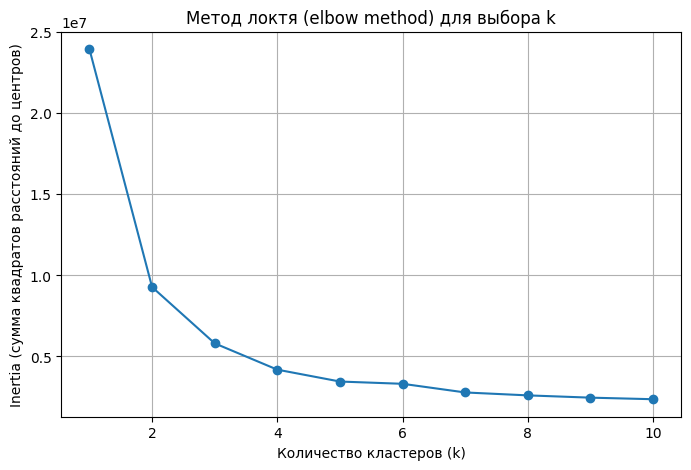

In [ ]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_pca)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Inertia (сумма квадратов расстояний до центров)')
plt.title('Метод локтя (elbow method) для выбора k')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

In [ ]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)

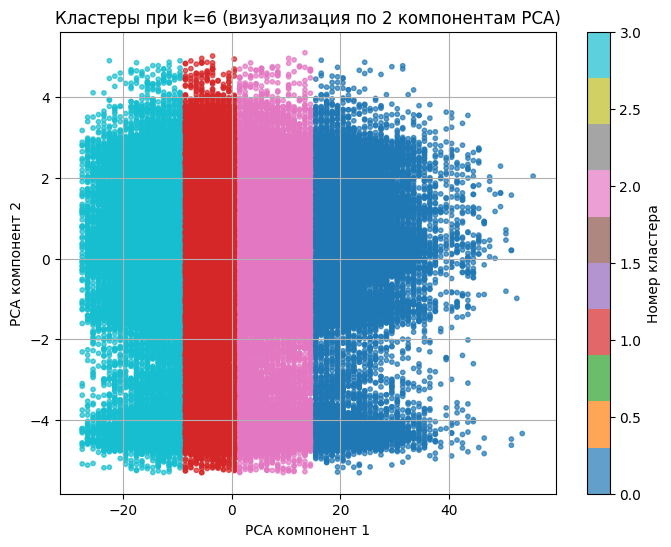

In [ ]:


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap='tab10', s=10, alpha=0.7)
plt.title('Кластеры при k=6 (визуализация по 2 компонентам PCA)')
plt.xlabel('PCA компонент 1')
plt.ylabel('PCA компонент 2')
plt.colorbar(scatter, label='Номер кластера')
plt.grid(True)
plt.show()


In [ ]:
import umap.umap_ as umap

In [ ]:
umap_2d = umap.UMAP(n_neighbors=30, min_dist=0.1, random_state=42)
X_umap = umap_2d.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
kmeans_umap = KMeans(n_clusters=6, random_state=42)
labels_umap = kmeans_umap.fit_predict(X_umap)

sample_df['cluster'] = labels_umap

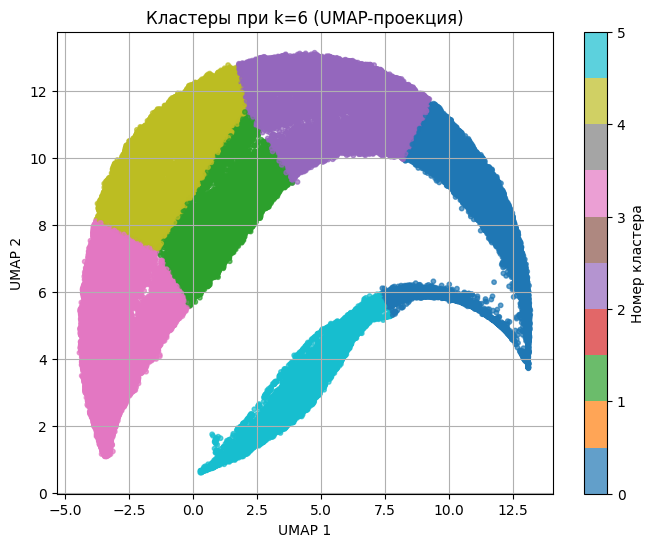

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_umap, cmap='tab10', s=10, alpha=0.7)
plt.title('Кластеры при k=6 (UMAP-проекция)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.colorbar(label='Номер кластера')
plt.show()

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=1000, min_samples=20, prediction_data=True)
labels_hdb = clusterer.fit_predict(X_umap)
sample_df['cluster_hdb'] = labels_hdb

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


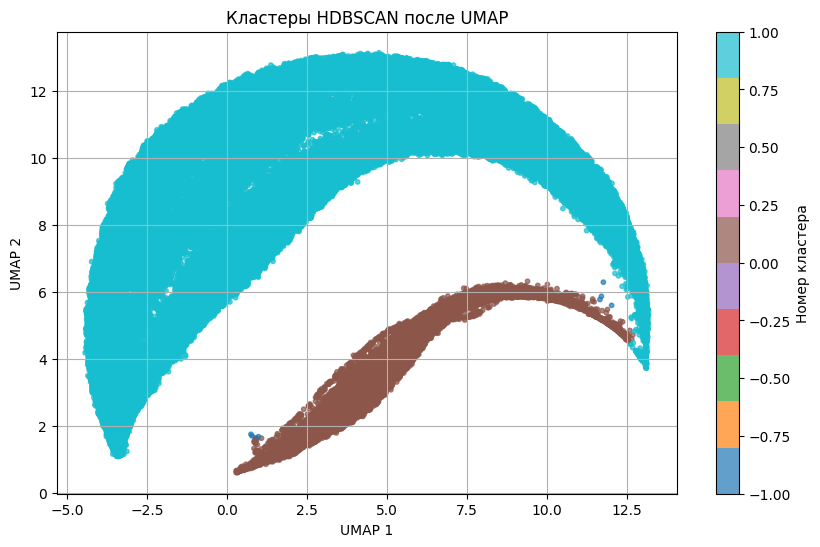

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_hdb, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter, label='Номер кластера')
plt.title('Кластеры HDBSCAN после UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [ ]:
summary = sample_df[sample_df['cluster'] != -1].groupby('cluster')[features].median().round(2)

cluster_sizes = sample_df['cluster'].value_counts().rename('size')
summary = summary.join(cluster_sizes, how='left')

summary = summary.sort_values('size', ascending=False)
summary

,Ishodjaschij_SBP_perevod_x,Poluchil_vhodjaschij_SBP_x,credit_class_x,sovokupnye_traty,avg_integral_cur_rur_balance,avg_out_puc,Traty_bolee_10tys,Podpiski_na_servisy,Onlajn_tranzaktsija,time_since_utilization_brk,...,count_of_open_brk,count_of_ever_opened_ccr,count_of_all_open,insurance_y,traveller_x,investor_x,t-gorod_x,life_exp_y,age,size
cluster,,,,,,,,,,,,,,,,,,,,,
4,1.0,1.0,2.0,4.0,4.0,4.0,1.0,0.0,1.0,-0.61,...,-0.63,-0.80,-0.44,1.0,0.0,0.0,0.0,2.0,37.0,30824
2,1.0,1.0,2.0,4.0,4.0,4.0,1.0,0.0,1.0,-0.75,...,-0.63,0.36,-0.44,1.0,0.0,0.0,0.0,2.0,48.0,30744
3,1.0,1.0,2.0,4.0,4.0,4.0,1.0,0.0,1.0,-0.75,...,-0.63,0.36,-0.44,1.0,0.0,0.0,0.0,2.0,28.0,29625
0,1.0,1.0,2.0,4.0,4.0,4.0,1.0,0.0,1.0,-0.75,...,-0.63,0.36,-0.44,1.0,0.0,0.0,0.0,1.0,61.0,25068
1,1.0,1.0,2.0,4.0,3.0,4.0,1.0,0.0,1.0,-0.75,...,1.12,0.36,0.21,1.0,0.0,0.0,0.0,2.0,38.0,17431
5,0.0,0.0,2.0,0.0,4.0,4.0,0.0,0.0,0.0,-0.75,...,-0.63,-0.80,-0.44,0.0,0.0,0.0,0.0,0.0,37.0,16308


In [ ]:
df.loc[sample_df.index, 'cluster'] = sample_df['cluster']


In [ ]:
sample_df.head()

,Ishodjaschij_SBP_perevod_x,Poluchil_vhodjaschij_SBP_x,credit_class_x,sovokupnye_traty,avg_integral_cur_rur_balance,avg_out_puc,Traty_bolee_10tys,Podpiski_na_servisy,Onlajn_tranzaktsija,time_since_utilization_brk,...,count_of_ever_opened_ccr,count_of_all_open,insurance_y,traveller_x,investor_x,t-gorod_x,life_exp_y,age,cluster,cluster_hdb
214220,1,0,2,4,5,5,1,0,1,1.984778,...,0.363142,-0.440391,1.0,0,1,0,1.0,48.0,2,1
151021,0,1,2,3,1,4,0,0,1,-0.753403,...,0.363142,-1.086701,0.0,0,0,0,1.0,38.0,4,1
19098,0,1,1,0,1,4,0,0,0,-0.753403,...,-0.799068,0.852229,0.0,0,0,0,0.0,44.0,5,0
520131,1,1,0,5,3,4,1,0,1,-0.753403,...,1.525351,-0.440391,0.0,0,0,0,2.0,52.0,2,1
586651,0,1,2,2,4,4,0,0,1,-0.753403,...,0.363142,1.498538,1.0,0,0,0,0.0,59.0,0,1


In [ ]:
df_no_cluster_0 = df[df['cluster'] != 0].copy()


In [ ]:
df_clean = df[df['cluster'].notna() & (df['cluster'] != 0)].copy()

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78344 entries, 2 to 593431
Data columns (total 90 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0_x                        78344 non-null  int64  
 1   key                                 78344 non-null  int64  
 2   target_x                            78344 non-null  int64  
 3   expiration_minus_1d_dt              78344 non-null  object 
 4   Poluchaet_ZP_x                      78344 non-null  int64  
 5   Oplata_SBP_po_QR_x                  78344 non-null  int64  
 6   Internet_x                          78344 non-null  int64  
 7   Ishodjaschij_SBP_perevod_x          78344 non-null  int64  
 8   Poluchil_vhodjaschij_SBP_x          78344 non-null  int64  
 9   credit_class_x                      78344 non-null  int64  
 10  avg_hl_delay_log                    77548 non-null  float64
 11  cred_av_log                         72916 non

In [ ]:
df_clean.to_csv('clustered_clients_clean.csv', index=False)

# еще раз по новой

In [ ]:
X = sample_df[features].copy()
X = X.fillna(X.median())

pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
sample_df['cluster_kmeans'] = kmeans.fit_predict(X_pca)


In [ ]:
agglo = AgglomerativeClustering(n_clusters=6)
sample_df['cluster_agglo'] = agglo.fit_predict(X_pca)

In [ ]:
hdb = hdbscan.HDBSCAN(min_cluster_size=1000, min_samples=20, prediction_data=True)
sample_df['cluster_hdbscan'] = hdb.fit_predict(X_pca)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
def plot_clusters(method):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=X_pca[:, 0], y=X_pca[:, 1],
        hue=sample_df[method],
        palette='tab10', s=10, linewidth=0
    )
    plt.title(f"Кластеры методом {method}")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend(title="Кластер", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

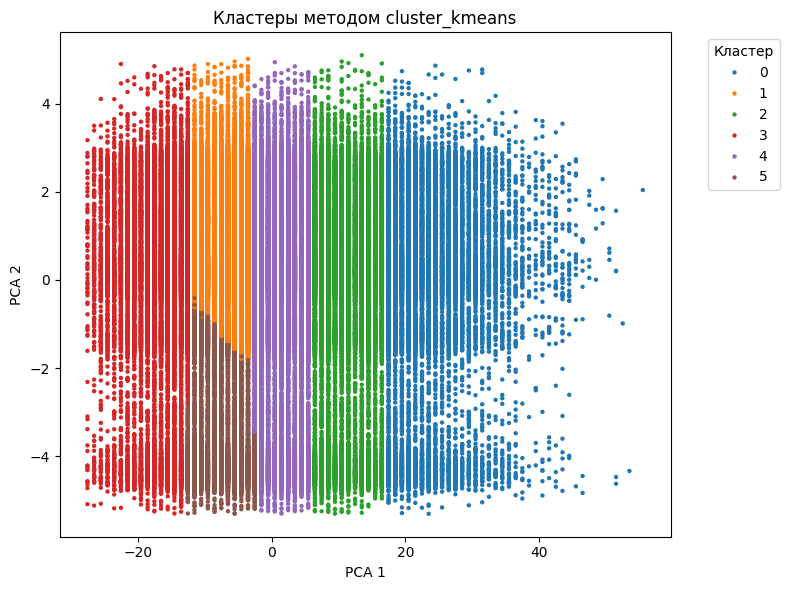

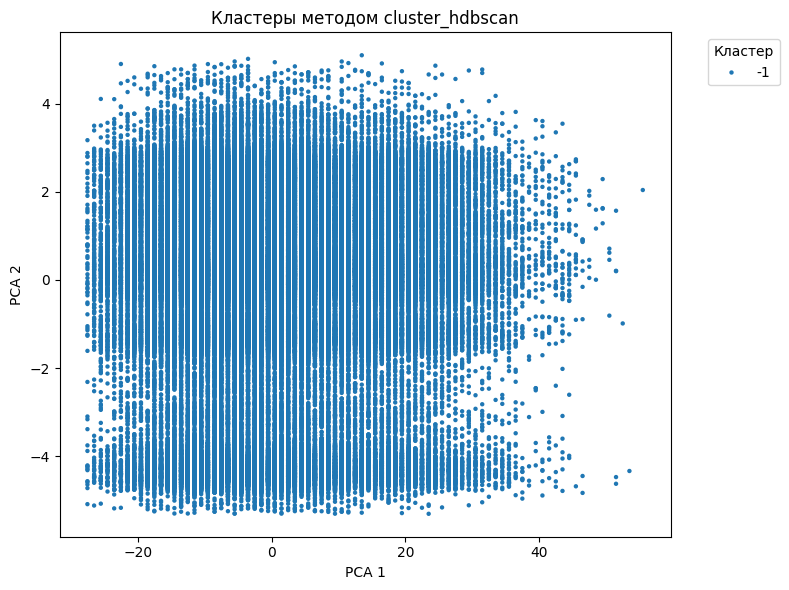

In [ ]:
plot_clusters('cluster_kmeans')
#plot_clusters('cluster_agglo')
plot_clusters('cluster_hdbscan')
